In [1]:
import pandas as pd
import numpy as np
import re
import os
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing algorithm & data split feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#importing evaluation metrics for the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### Problem Statement:

In [2]:
# Y = target variable = Volume
# X = Independent variables 


## Data Gathering

In [3]:
df = pd.read_csv('/home/abhishek/Documents/tesla/TSLA_5_Year.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
...,...,...,...,...,...,...,...
1337,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
1338,2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100
1339,2022-04-28,899.979980,900.000000,821.700012,877.510010,877.510010,41649500
1340,2022-04-29,902.250000,934.400024,870.000000,870.760010,870.760010,29313400


### Data Analysis

In [4]:
df.shape

(1342, 7)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1342 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.5+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df2 = df.copy()
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
...,...,...,...,...,...,...,...
1337,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
1338,2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100
1339,2022-04-28,899.979980,900.000000,821.700012,877.510010,877.510010,41649500
1340,2022-04-29,902.250000,934.400024,870.000000,870.760010,870.760010,29313400


### Data processsing

In [9]:
#Conversion data type column -  date from object to Datetime

df2["Date"]=pd.to_datetime(df2["Date"])

In [10]:
# check unique value
df2.nunique().sort_values()

High         1290
Open         1294
Low          1305
Close        1323
Adj Close    1323
Volume       1337
Date         1342
dtype: int64

In [11]:
# check duplicated  value
df2.duplicated().sum()

0

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1342 non-null   datetime64[ns]
 1   Open       1342 non-null   float64       
 2   High       1342 non-null   float64       
 3   Low        1342 non-null   float64       
 4   Close      1342 non-null   float64       
 5   Adj Close  1342 non-null   float64       
 6   Volume     1342 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 73.5 KB


In [13]:
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Year'] = df2['Date'].dt.year
df2["Month"]=df2["Date"].dt.month

In [14]:
df2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1
5,2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000,2017,1
6,2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000,2017,1
7,2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000,2017,1
8,2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000,2017,1
9,2017-01-17,47.340000,47.992001,46.874001,47.116001,47.116001,23087500,2017,1


## Visualization and analysis

<AxesSubplot:xlabel='Date', ylabel='High'>

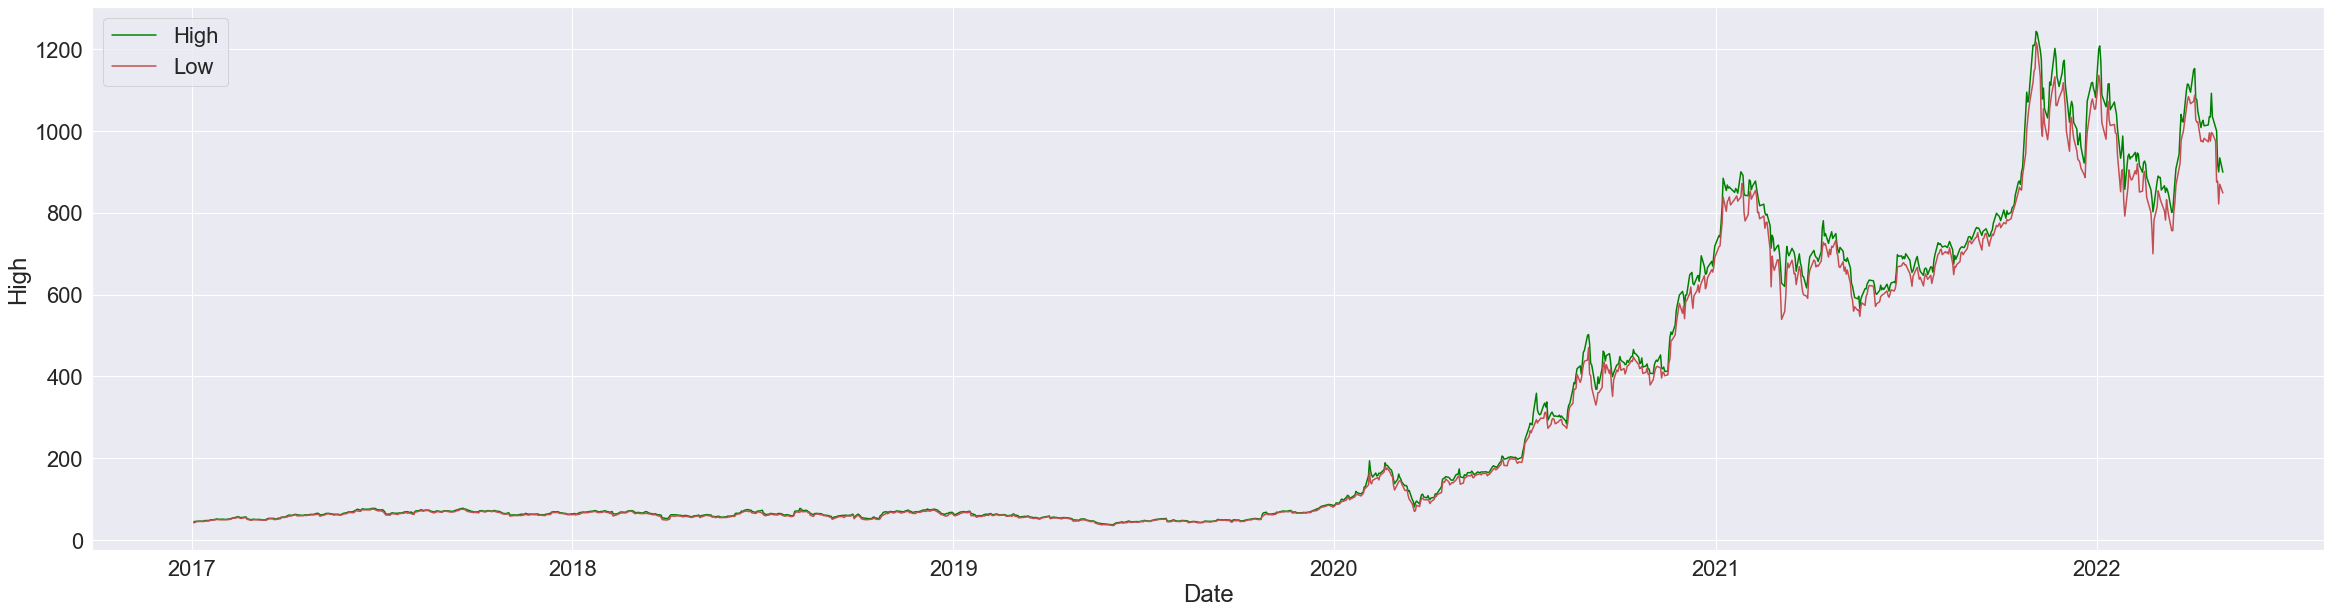

In [15]:
plt.figure(figsize=(40,10))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='High', data=df2,color = 'green',label = 'High')
sns.lineplot(x='Date', y='Low', data=df2,color = 'r',label = 'Low')

<AxesSubplot:xlabel='Date', ylabel='Open'>

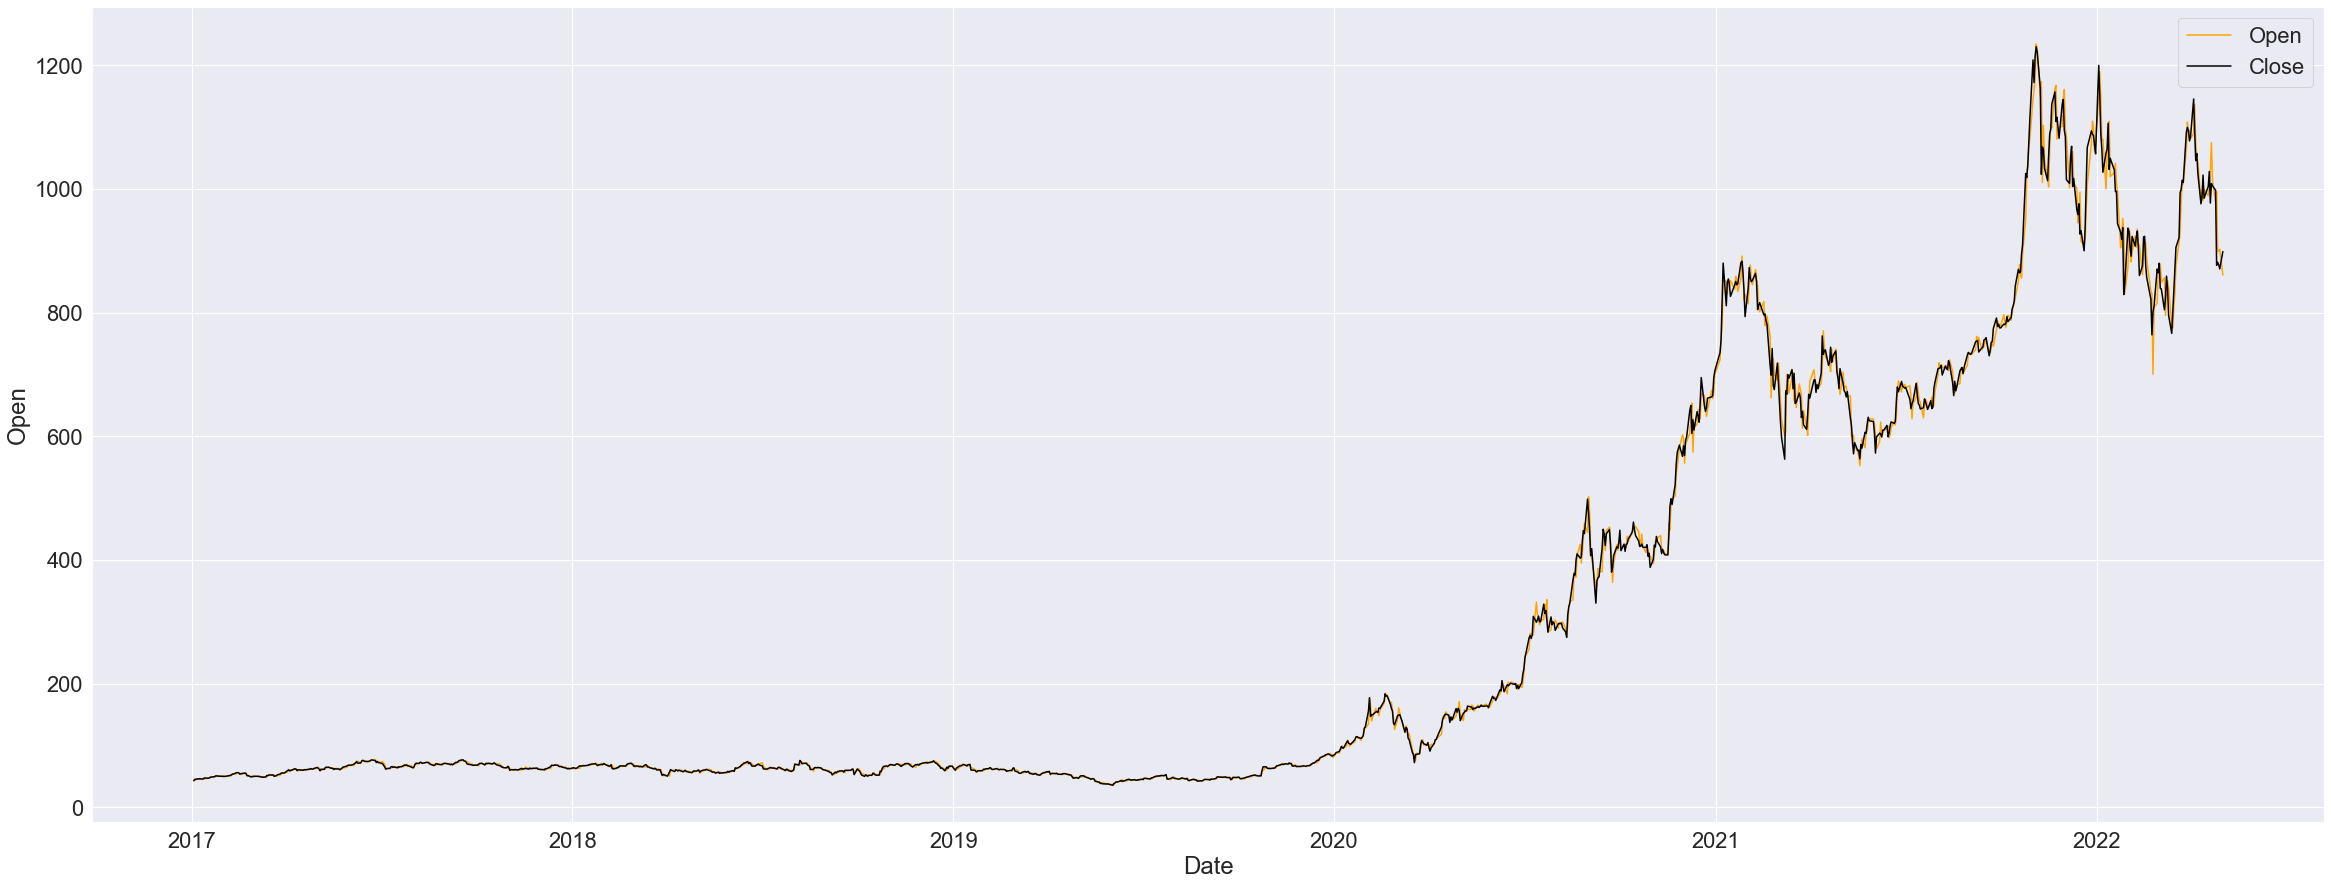

In [16]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='Open', data=df2,color = 'orange',label = 'Open')
sns.lineplot(x='Date', y='Close', data=df2,color = 'black',label = 'Close')

In [17]:
a = df2.groupby("Year")['High','Low','Open','Close'].mean().round(2)
a

,High,Low,Open,Close
Year,,,,
2017,63.69,61.94,62.86,62.86
2018,64.74,62.11,63.44,63.46
2019,55.53,53.72,54.61,54.71
2020,297.29,280.70,289.11,290.00
2021,795.73,762.71,779.84,779.99
2022,977.56,924.13,952.82,949.15


<AxesSubplot:xlabel='Year'>

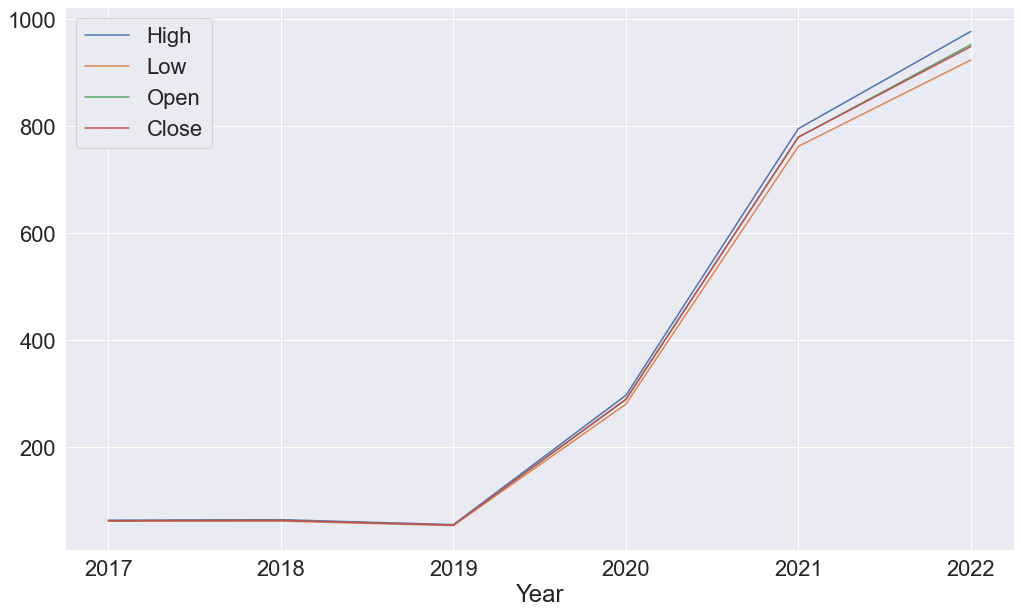

In [18]:
# all the prices are increasing with time
#Draw the graph to show year wise increase

a.plot(figsize=(17,10))

## Building the model

### Training the data

In [19]:
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [20]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1


In [21]:
# drop useless data columns

df2 = df2.drop(columns=['Date','Adj Close'])

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1342 non-null   float64
 1   High    1342 non-null   float64
 2   Low     1342 non-null   float64
 3   Close   1342 non-null   float64
 4   Volume  1342 non-null   int64  
 5   Year    1342 non-null   int64  
 6   Month   1342 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 73.5 KB


In [23]:
# Splitting the variables
x = df2.drop('Volume',axis = 1)
y = df2['Volume']

In [24]:
#splitting the train data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 1)

In [25]:

print("X Train : ", x_train.shape)
print("X Test  : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1073, 6)
X Test  :  (269, 6)
Y Train :  (1073,)
Y Test  :  (269,)


### Predicting the value

In [26]:

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor(n_neighbors=10,weights='distance',algorithm='brute',leaf_size=50, p=15)
MLP = MLPRegressor()
XGB = XGBRegressor(n_estimators=60,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,learning_rate=0.15)





In [27]:
print("X Train : ", x_train.shape)
print("X Test  : ", x_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (1073, 6)
X Test  :  (269, 6)
Y Train :  (1073,)
Y Test  :  (269,)


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1342 non-null   float64
 1   High    1342 non-null   float64
 2   Low     1342 non-null   float64
 3   Close   1342 non-null   float64
 4   Volume  1342 non-null   int64  
 5   Year    1342 non-null   int64  
 6   Month   1342 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 73.5 KB


In [29]:
# loop o regression
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB]
d = {}
for i in li:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    print(i,":",r2_score(y_test,y_pred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})

LinearRegression() : 26.869932546429396
DecisionTreeRegressor() : 12.877667675482474
RandomForestRegressor() : 57.455272559498226
KNeighborsRegressor(algorithm='brute', leaf_size=50, n_neighbors=10, p=15,
                    weights='distance') : 42.47738147900774
MLPRegressor() : -209.43118467504883
KNeighborsRegressor(algorithm='brute', leaf_size=50, n_neighbors=10, p=15,
                    weights='distance') : 42.47738147900774
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=60, n_job

In [30]:
# hence XGB regressor is the  best model with score 69

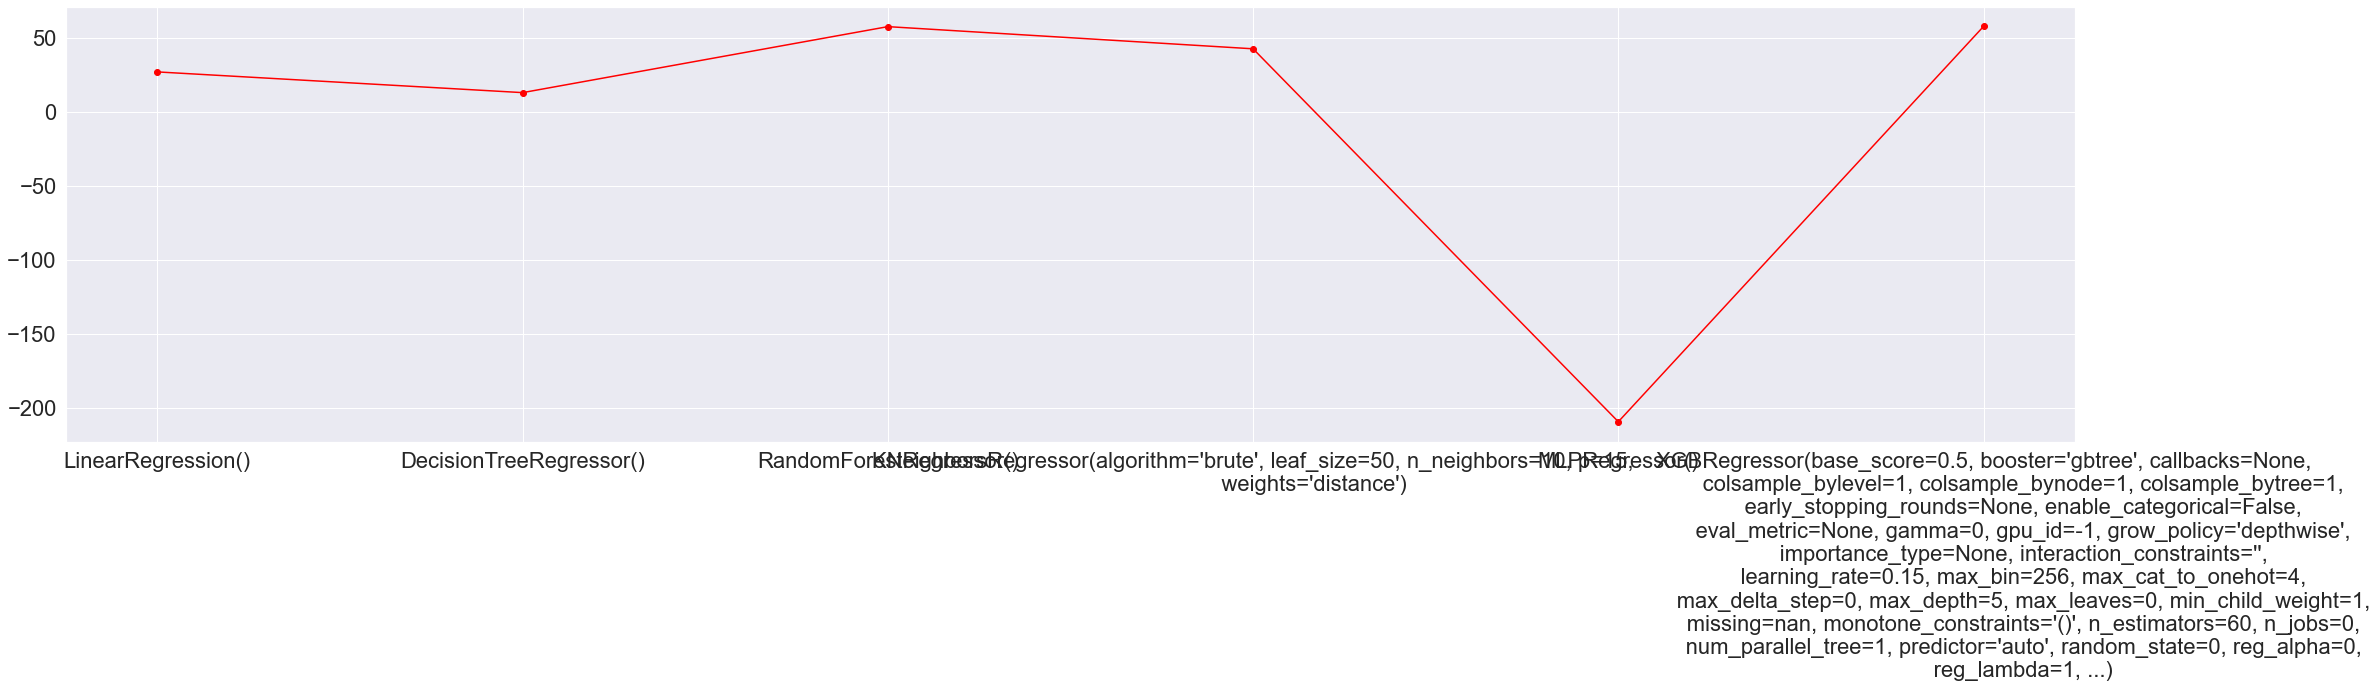

In [31]:
# making the graph of accuracy
plt.figure(figsize=(36, 8))
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

In [32]:
XGB_model=XGBRegressor(n_estimators=60,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,learning_rate=0.15)

### Fit Model

In [33]:
XGB_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=60, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Score X and Y - test and train

In [34]:
print("Score the X-train with Y-train is : ", XGB_model.score(x_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(x_test,y_test))

Score the X-train with Y-train is :  0.8604065049379583
Score the X-test  with Y-test  is :  0.5761768667172578


### predicting the values

In [35]:
y_pred=XGB_model.predict(x_test)

### Model Evaluation

In [36]:
ME = r2_score(y_test,y_pred)
ME

0.5761768667172578

In [37]:
#so the best selection model is XGB Regressor model